In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_7[0][0]                

In [12]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3662 - mae: 0.4330 - val_loss: 0.3596 - val_mae: 0.4205
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3650 - mae: 0.4320 - val_loss: 0.4056 - val_mae: 0.4274
Epoch 3/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3642 - mae: 0.4320 - val_loss: 0.3878 - val_mae: 0.4213
Epoch 4/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3633 - mae: 0.4308 - val_loss: 0.3550 - val_mae: 0.4213
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3623 - mae: 0.4299 - val_loss: 0.3476 - val_mae: 0.4188
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3611 - mae: 0.4298 - val_loss: 0.3716 - val_mae: 0.4185
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3605 - mae: 0.4287 - val_loss: 0.3586 - val_mae: 0.4188
Epoch 8/40
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [18]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 871us/step - loss: 0.3467 - mae: 0.4133


In [15]:
model_history.history

{'loss': [1.842244029045105,
  0.7257976531982422,
  0.6472155451774597,
  0.5944114923477173,
  0.5538226366043091,
  0.5217078924179077,
  0.4970484972000122,
  0.4783681333065033,
  0.46334925293922424,
  0.4515114724636078,
  0.4425385594367981,
  0.43484771251678467,
  0.42868027091026306,
  0.42320820689201355,
  0.418521910905838,
  0.41442161798477173,
  0.4107412099838257,
  0.4075146019458771,
  0.40391743183135986,
  0.4012852907180786,
  0.39877963066101074,
  0.3959878385066986,
  0.3939673900604248,
  0.39152130484580994,
  0.3891400098800659,
  0.38755571842193604,
  0.38585254549980164,
  0.38389331102371216,
  0.38226041197776794,
  0.38028907775878906,
  0.37883222103118896,
  0.3772086203098297,
  0.3765202760696411,
  0.3746984899044037,
  0.3732829689979553,
  0.3722652792930603,
  0.3708628714084625,
  0.3696014881134033,
  0.36847376823425293,
  0.3672168552875519],
 'mae': [0.9134849905967712,
  0.6194171905517578,
  0.5834541916847229,
  0.5572080016136169,
  0

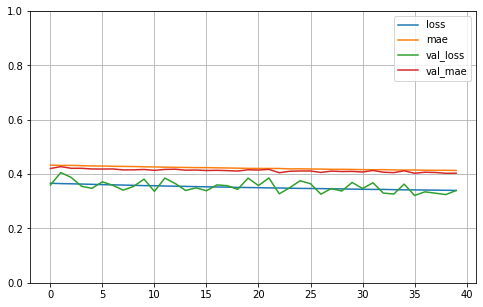

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()